# Name: Soh Jian Min
# Admin Number: P2238856
# Class: EL/EP0302/FT/01
# Title: Market Trends and Insights for Housing Agents in Singapore: Analyzing Popular Flat Types, Sales, and Economic Influences
---
## Story Line
As a data analyst, I aim to assist a housing agent company named "houseNow" in Singapore in understanding market trends and identifying the most popular types of flats and sales. This is crucial for advising clients and making informed decisions.

## Questions
1. What types of sales are most popular in the private residential property market?
2. Which flat types are most popular in the HDB resale market?
3. Does GDP and GNI affect the price index of HDB and Private housing?
4. Does GDP and GNI affect the Applications/Transactions of HDB and Private housing?
5. What types of flats should housing agents focus on to maximize their sales?
6. How do the prices of private and HDB resale properties compare across different quarters?

## Data Source
1. https://beta.data.gov.sg/datasets/d_7c69c943d5f0d89d6a9a773d2b51f337/view (Private Residential Property Transactions in the Whole of Singapore, Quarterly)
2. https://beta.data.gov.sg/datasets/d_02aa4bb51bc674f3a2d0b9bb6911d934/view (Number of Resale Applications Registered by Flat Type)
3. https://beta.data.gov.sg/datasets/d_14f63e595975691e7c24a27ae4c07c79/view (Housing And Development Board Resale Price Index (1Q2009 = 100), Quarterly)
4. https://beta.data.gov.sg/datasets/d_97f8a2e995022d311c6c68cfda6d034c/view (Private Residential Property Price Index (Base Quarter 2009-Q1 = 100), Quarterly)
5. https://beta.data.gov.sg/datasets/d_dce7d88c668273bb8c1291027e63325a/view (Per Capita GNI And Per Capita GDP At Current Prices, Annual)

## Load data from CSV files

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_check_data(file_path, var_name):
    # Load the dataset
    df = pd.read_csv(file_path)
    print("Successfully loaded dataset " + file_path)
    # Check if the data needs to be transposed
    if df.shape[0] < df.shape[1]:
        print(var_name + ' data needs to be transposed')
    
    return df

# Load datasets
private_sales = load_and_check_data('PrivateResidentialPropertyTransactionsintheWholeofSingaporeQuarterly.csv', 'private_sales')
hdb_resale = load_and_check_data('NumberofResaleApplicationsRegisteredbyFlatType.csv', 'hdb_resale')
hdb_resale_price_index = load_and_check_data('HousingAndDevelopmentBoardResalePriceIndex1Q2009100Quarterly.csv', 'hdb_resale_price_index')
private_residential_price_index = load_and_check_data('PrivateResidentialPropertyPriceIndexBaseQuarter2009Q1100Quarterly.csv', 'private_residential_price_index')
gdp_data = load_and_check_data('PerCapitaGNIAndPerCapitaGDPAtCurrentPricesAnnual.csv', 'gdp_data')



Successfully loaded dataset PrivateResidentialPropertyTransactionsintheWholeofSingaporeQuarterly.csv
Successfully loaded dataset NumberofResaleApplicationsRegisteredbyFlatType.csv
Successfully loaded dataset HousingAndDevelopmentBoardResalePriceIndex1Q2009100Quarterly.csv
Successfully loaded dataset PrivateResidentialPropertyPriceIndexBaseQuarter2009Q1100Quarterly.csv
Successfully loaded dataset PerCapitaGNIAndPerCapitaGDPAtCurrentPricesAnnual.csv
gdp_data data needs to be transposed


# Transpose Data & Text-Based Analysis

In [37]:
# Transpose gdp data (horizontal to vertical)
gdp_data = gdp_data.transpose()
gdp_data.columns = gdp_data.iloc[0]  # Set the first row as the header
gdp_data = gdp_data.drop(gdp_data.index[0])  # Drop the first row
gdp_data = gdp_data.reset_index()
gdp_data.columns.name = None # Remove the column name
gdp_data.rename(columns={'index': 'year'}, inplace=True)

# Do a Text-Based Analysis on the datasets
def text_based_analysis(df, var_name, col_for_descriptive_stats=[]):
    df.replace('na', pd.NA, inplace=True)
    print("Text-Based Analysis for " + var_name)
    print()

    # Shape of the dataset
    print('This is the shape of the dataset:')
    print(df.shape)
    print()
    
    # Index of the dataset
    print('This is the index of the dataset:')
    print(df.index)
    print()
    
    # Columns of the dataset
    print('These are the columns of the dataset:')
    print(df.columns)
    print()
    
    # Non-NA values of each column in the dataset
    print('The total number of non-NA values in the dataset is:')
    print(df.count())
    print()

    # NA values of each column in the dataset
    print("The total number of NA values in the dataset is:")
    print(df.isnull().sum())
    print("\n")
    
    # Summary of the dataset
    print("A summary of this dataset is shown below:")
    print(df.info())

    # Descriptive statistics summary of the dataset based on the col_for_descriptive_stats specified
    print("A descriptive statistics summary of this dataset is shown below:")
    for col in col_for_descriptive_stats:
        if col in df.columns:
            print(f"A descriptive statistical summary of this dataset is shown below for: {col}")
            if df[col].dtype in ['float64', 'int64']:
                print(df[col].describe())
            else:
                print(df[col].astype('float64').describe())
            print()
        else:
            print(f"Column '{col}' not found in the dataset.")
            print()
            print()

    print("=====================================================================")
    print()

text_based_analysis(private_sales, 'private_sales', ["units"])
text_based_analysis(hdb_resale, 'hdb_resale', ["no_of_resale_applications"])
text_based_analysis(hdb_resale_price_index, 'hdb_resale_price_index', ["index"])
text_based_analysis(private_residential_price_index, 'private_residential_price_index', ["index"])
text_based_analysis(gdp_data, 'gdp_data', ["Per Capita GNI", "Per Capita GDP", "Per Capita GNI (US Dollar)", "Per Capita GDP (US Dollar)"])


Text-Based Analysis for private_sales

This is the shape of the dataset:
(392, 4)

This is the index of the dataset:
RangeIndex(start=0, stop=392, step=1)

These are the columns of the dataset:
Index(['quarter', 'type_of_sale', 'sale_status', 'units'], dtype='object')

The total number of non-NA values in the dataset is:
quarter         392
type_of_sale    392
sale_status     196
units           392
dtype: int64

The total number of NA values in the dataset is:
quarter           0
type_of_sale      0
sale_status     196
units             0
dtype: int64


A summary of this dataset is shown below:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   quarter       392 non-null    object
 1   type_of_sale  392 non-null    object
 2   sale_status   196 non-null    object
 3   units         392 non-null    int64 
dtypes: int64(1), object(3)
memory usage:

# Cleaning, filtering and transforming Datasets

In [38]:
# Cleaning the data

# Replace NaN values with 'Total Applications' in the 'sale_status' column
private_sales['sale_status'] = private_sales['sale_status'].fillna('Applied')


# Transforming the data
# private_sales
# Pivot the DataFrame
pivot_df = private_sales.pivot_table(index='quarter', columns=['type_of_sale', 'sale_status'], values='units', aggfunc='sum')
# Flatten the MultiIndex columns
pivot_df.columns = ['private_' + '_'.join(col).lower().strip() if isinstance(col, tuple) else col.lower() for col in pivot_df.columns]
# Reset the index to turn the 'quarter' index back into a column
pivot_df = pivot_df.reset_index()
# Expected columns
expected_columns = ['quarter', 'private_new sale_completed', 'private_new sale_uncompleted', 'private_resale_applied', 'private_sub sale_applied']
# Reindex to ensure all expected columns are present, filling missing columns with 0
pivot_df = pivot_df.reindex(columns=expected_columns, fill_value=0)
# Assign the pivoted DataFrame back to the original DataFrame
private_sales=pivot_df
# print(private_sales.head())

# hdb_resale
# Pivot the DataFrame
pivot_df = hdb_resale.pivot_table(index='quarter', columns='flat_type', values='no_of_resale_applications', aggfunc='sum')
# Flatten the MultiIndex columns and convert to lowercase
pivot_df.columns = ['hdb_' + col.replace(' ', '_').replace("-", "_").lower() for col in pivot_df.columns]
# Reset the index to turn the 'quarter' index back into a column
pivot_df = pivot_df.reset_index()
# Expected columns
expected_columns = ['quarter', 'hdb_1_room', 'hdb_2_room', 'hdb_3_room', 'hdb_4_room', 'hdb_5_room', 'hdb_executive']
# Reindex to ensure all expected columns are present, filling missing columns with 0
pivot_df = pivot_df.reindex(columns=expected_columns, fill_value=0)
# Rename pivot_df back to hdb_resale
hdb_resale = pivot_df
# print(hdb_resale.head())

# private_residential_price_index
# Group by 'quarter' and calculate the mean of 'index'
private_residential_price_index= private_residential_price_index.groupby('quarter')['index'].mean().reset_index()
# Round the index values to 1 decimal place
private_residential_price_index['index'] = private_residential_price_index['index'].round(1)
# print(private_residential_price_index.head())

# Filtering and Joining the Datasets
# Merge datasets on quarter
merged_data = private_sales.merge(hdb_resale, on='quarter', how='inner')
merged_data = merged_data.merge(hdb_resale_price_index, on='quarter', how='inner')
merged_data = merged_data.merge(private_residential_price_index, on='quarter', how='inner', suffixes=('_hdb', '_private'))

# Extract year from quarter for GDP data merging
merged_data['year'] = merged_data['quarter'].str[:4].astype(int)
# Ensure the year column is of the same type in both DataFrames
gdp_data['year'] = gdp_data['year'].astype(str)
merged_data['year'] = merged_data['year'].astype(str)
# Merge GDP data based on year
merged_data = merged_data.merge(gdp_data, on='year', how='left')
# Drop the 'year' column as it's no longer needed
merged_data = merged_data.drop(columns=['year'])

# Convert columns to appropriate numeric types
columns_to_numeric = [
    'private_new sale_completed', 'private_new sale_uncompleted', 'private_resale_applied', 'private_sub sale_applied',
    'hdb_1_room', 'hdb_2_room', 'hdb_3_room', 'hdb_4_room', 'hdb_5_room', 'hdb_executive',
    'index_hdb', 'index_private', 'Per Capita GNI', 'Per Capita GDP',
    'Per Capita GNI (US Dollar)', 'Per Capita GDP (US Dollar)'
]

for col in columns_to_numeric:
    merged_data[col] = pd.to_numeric(merged_data[col], errors='coerce')

# Drop rows with any NaN values
merged_data.dropna(inplace=True)


   quarter  private_new sale_completed  private_new sale_uncompleted  \
0  2007-Q1                         218                          4565   
1  2007-Q2                         309                          4820   
2  2007-Q3                          83                          3367   
3  2007-Q4                          52                          1397   
4  2008-Q1                          32                           730   

   private_resale_applied  private_sub sale_applied  hdb_1_room  hdb_2_room  \
0                    4653                       766           5          67   
1                    7776                      1892           3          65   
2                    5255                      1535           6          65   
3                    3296                       670           7          80   
4                    2210                       435           3          59   

   hdb_3_room  hdb_4_room  hdb_5_room  hdb_executive  index_hdb  \
0        1908        2365

# Question 1: What types of sales are most popular in the private residential property market?

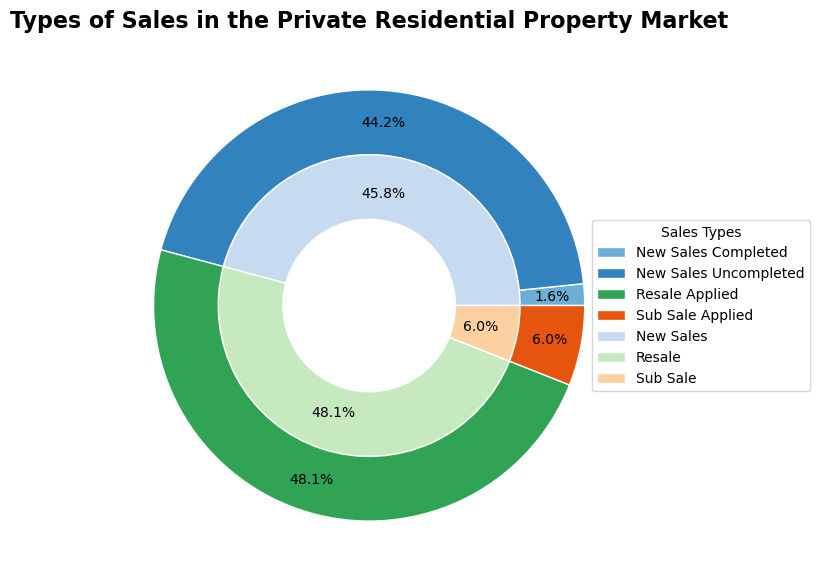

In [39]:
# Aggregate the sales data
new_sales_completed = merged_data['private_new sale_completed'].sum()
new_sales_uncompleted = merged_data['private_new sale_uncompleted'].sum()
resale_applied = merged_data['private_resale_applied'].sum()
sub_sale_applied = merged_data['private_sub sale_applied'].sum()

# Data for the outer layer
outer_sizes = [new_sales_completed, new_sales_uncompleted, resale_applied, sub_sale_applied]
outer_labels = ['New Sales Completed', 'New Sales Uncompleted', 'Resale Applied', 'Sub Sale Applied']

# Data for the inner layer
inner_sizes = [new_sales_completed + new_sales_uncompleted, resale_applied, sub_sale_applied]
inner_labels = ['New Sales', 'Resale', 'Sub Sale']

# Define colors for inner and outer rings (matched pairs)
# We will use a base color and create lighter and darker shades for inner and outer segments
inner_colors = ['#c6dbef', '#c7e9c0', '#fdd0a2']  # light shades

# Plotting the donut chart
fig, ax = plt.subplots(figsize=(7, 7))
size = 0.3

# Inner ring
wedges1, texts1, autotexts1 = ax.pie(
    inner_sizes, labels=None, radius=1-size, 
    wedgeprops=dict(width=size, edgecolor='w'), 
    autopct='%1.1f%%', pctdistance=0.75, colors=inner_colors
)

# Outer ring
# Assigning matching colors for New Sales Completed and Uncompleted to have similar colors with different shades
outer_colors = ['#6baed6', '#3182bd', '#31a354', '#e6550d']

wedges2, texts2, autotexts2 = ax.pie(
    outer_sizes, labels=None, radius=1, 
    wedgeprops=dict(width=size, edgecolor='w'), 
    autopct='%1.1f%%', pctdistance=0.85, colors=outer_colors
)

# Set aspect ratio to be equal
ax.set(aspect="equal")

# Title
plt.title('Types of Sales in the Private Residential Property Market', fontweight='bold', fontsize=16)

# Legend
legend_labels = ['New Sales Completed', 'New Sales Uncompleted', 'Resale Applied', 'Sub Sale Applied', 'New Sales', 'Resale', 'Sub Sale']
ax.legend(wedges2 + wedges1, legend_labels, title="Sales Types", loc="center left", bbox_to_anchor=(0.9, 0, 0.5, 1))

# Display the plot
plt.show()

## Analysis of Types of Sales in the Private Residential Property Market
**1. Dominance of New Sales:**
    - New Sales (both completed and uncompleted) make up the majority of the market at around 45.8% of the total sales.
    - Within New Sales, the majority are New Sales Uncompleted (44.2%), while a much smaller proportion are New Sales Completed (1.6%).

**2. Resale Market:**
    - Resale Applied represents a significant portion of the market, at 48.1%. This suggests that a large number of buyers are opting for resale properties instead of new ones.
    - The high percentage of resale properties indicates a robust secondary market for private residential properties.

**3. Sub Sale Market:**
    - Sub Sale Applied is the smallest segment, comprising 6.0% of the total sales. This indicates that sub-sales (where properties are sold before the initial buyer completes the transaction) are less common compared to new sales and resale applied.

### Market Implications
- **Supply and Demand for New Sales:**
    - The high proportion of new sales, especially uncompleted ones, might indicate strong demand for new developments. However, the low proportion of completed new sales suggests possible delays in project completions or buyers preferring to buy off-plan properties.

- **Resale Market Robustness:**
    - The significant portion of resale applied properties highlights a healthy demand for existing homes. This could be due to various factors such as better location, established neighborhoods, or price considerations.

- **Lower Sub Sale Activity:**
    - The relatively small percentage of sub sales suggests that fewer investors are flipping properties quickly. This might indicate stability in the market, with more end-users purchasing homes for personal use rather than for investment purposes.

### Recommendations

**For Buyers:**
- Those looking for immediate occupancy might find more options in the resale market.
Buyers interested in new developments should be aware of the high number of uncompleted sales, which might entail waiting for construction to finish.

**For Developers:**
- The high demand for new sales indicates potential for further development projects.
Addressing the factors leading to the low completion rate of new sales could improve market perception and buyer confidence.

**For Investors:**
- The dominant resale market suggests opportunities for investment in existing properties, potentially for rental income or future resale.
Given the lower activity in sub sales, investors looking to flip properties should be cautious and consider market conditions carefully.

# Question 2: Which flat types are most popular in the HDB resale market?

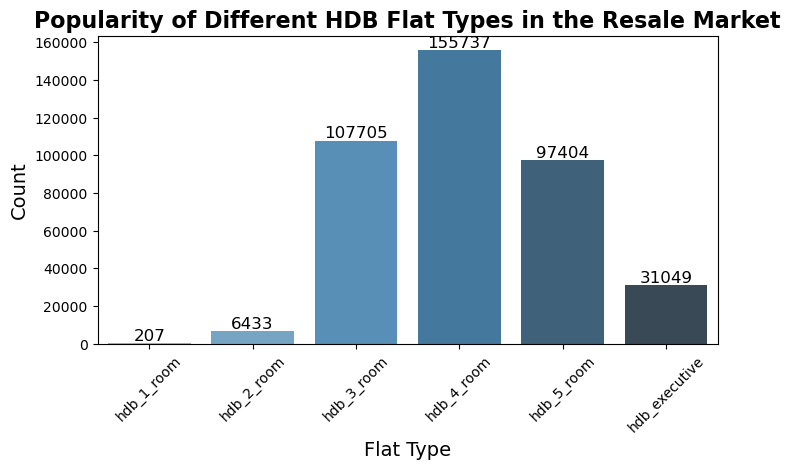

In [40]:
# Sum the counts for each flat type column
flat_type_sums = merged_data[['hdb_1_room', 'hdb_2_room', 'hdb_3_room', 'hdb_4_room', 'hdb_5_room', 'hdb_executive']].sum()

# Create a DataFrame for plotting
flat_type_counts = flat_type_sums.reset_index()
flat_type_counts.columns = ['Flat Type', 'Count']

# Plot the bar chart using Seaborn
plt.figure(figsize=(8, 4))
bar_plot = sns.barplot(x='Flat Type', y='Count', hue='Flat Type', data=flat_type_counts, palette='Blues_d', dodge=False, legend=False)
plt.title('Popularity of Different HDB Flat Types in the Resale Market', fontweight='bold', fontsize=16)
plt.xlabel('Flat Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)

# Add the sum on top of each bar
for index, row in flat_type_counts.iterrows():
    bar_plot.text(row.name, row.Count, round(row.Count, 2), color='black', ha="center", va="bottom", fontsize=12)

plt.show()

# Analysis of Popularity of Different HDB Flat Types in the Resale Market

# Question 3: Does GDP and GNI affect the price index of HDB and Private housing?

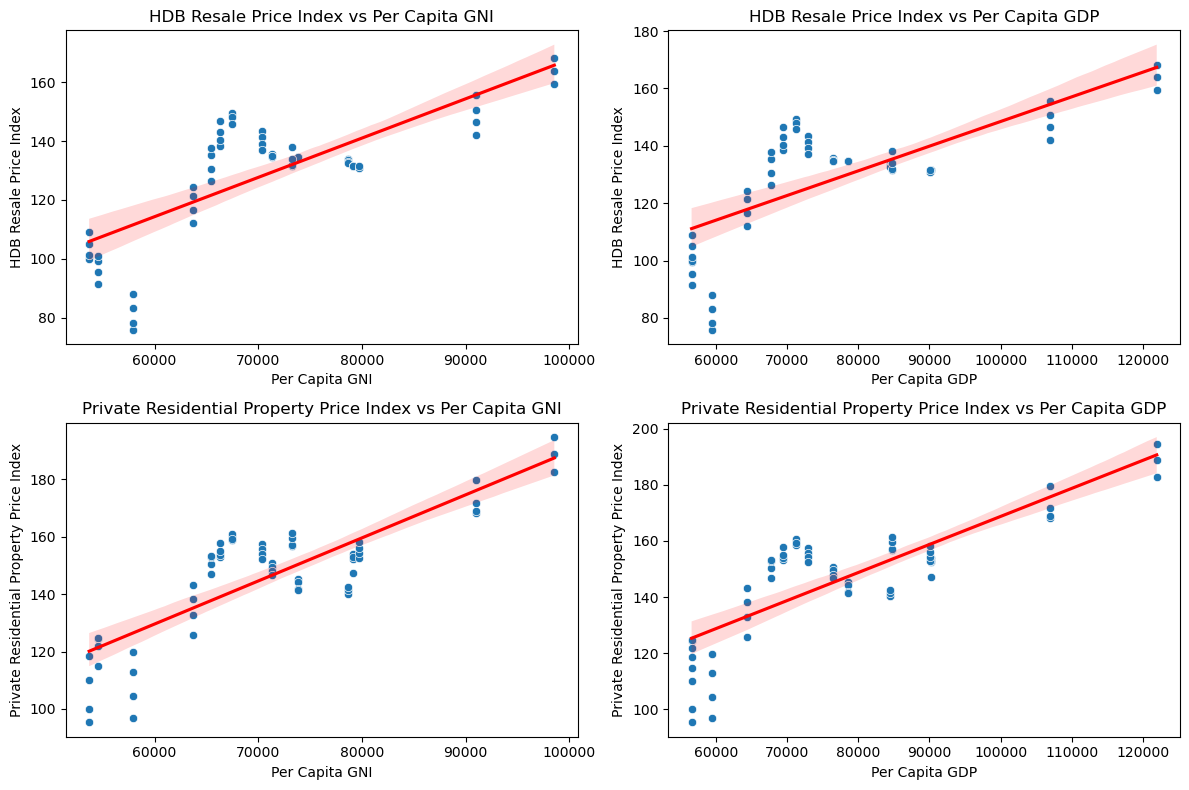

In [41]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Scatter plot for index_hdb vs Per Capita GNI
sns.scatterplot(data=merged_data, x='Per Capita GNI', y='index_hdb', ax=axs[0, 0])
sns.regplot(data=merged_data, x='Per Capita GNI', y='index_hdb', ax=axs[0, 0], scatter=False, line_kws={"color": "red"})
axs[0, 0].set_title('HDB Resale Price Index vs Per Capita GNI')
axs[0, 0].set_xlabel('Per Capita GNI')
axs[0, 0].set_ylabel('HDB Resale Price Index')

# Scatter plot for index_hdb vs Per Capita GDP
sns.scatterplot(data=merged_data, x='Per Capita GDP', y='index_hdb', ax=axs[0, 1])
sns.regplot(data=merged_data, x='Per Capita GDP', y='index_hdb', ax=axs[0, 1], scatter=False, line_kws={"color": "red"})
axs[0, 1].set_title('HDB Resale Price Index vs Per Capita GDP')
axs[0, 1].set_xlabel('Per Capita GDP')
axs[0, 1].set_ylabel('HDB Resale Price Index')

# Scatter plot for index_private vs Per Capita GNI
sns.scatterplot(data=merged_data, x='Per Capita GNI', y='index_private', ax=axs[1, 0])
sns.regplot(data=merged_data, x='Per Capita GNI', y='index_private', ax=axs[1, 0], scatter=False, line_kws={"color": "red"})
axs[1, 0].set_title('Private Residential Property Price Index vs Per Capita GNI')
axs[1, 0].set_xlabel('Per Capita GNI')
axs[1, 0].set_ylabel('Private Residential Property Price Index')

# Scatter plot for index_private vs Per Capita GDP
sns.scatterplot(data=merged_data, x='Per Capita GDP', y='index_private', ax=axs[1, 1])
sns.regplot(data=merged_data, x='Per Capita GDP', y='index_private', ax=axs[1, 1], scatter=False, line_kws={"color": "red"})
axs[1, 1].set_title('Private Residential Property Price Index vs Per Capita GDP')
axs[1, 1].set_xlabel('Per Capita GDP')
axs[1, 1].set_ylabel('Private Residential Property Price Index')

plt.tight_layout()
plt.show()

## Analysis for HDB Resale Price Index vs Per Capita GNI & Analysis for HDB Resale Price Index vs Per Capita GDP

## Private Residential Property Price Index vs Per Capita GNI & Private Residential Property Price Index vs Per Capita GDP

## Summary


# Question 4: Does GDP and GNI affect the Applications/Transactions of HDB and Private housing?

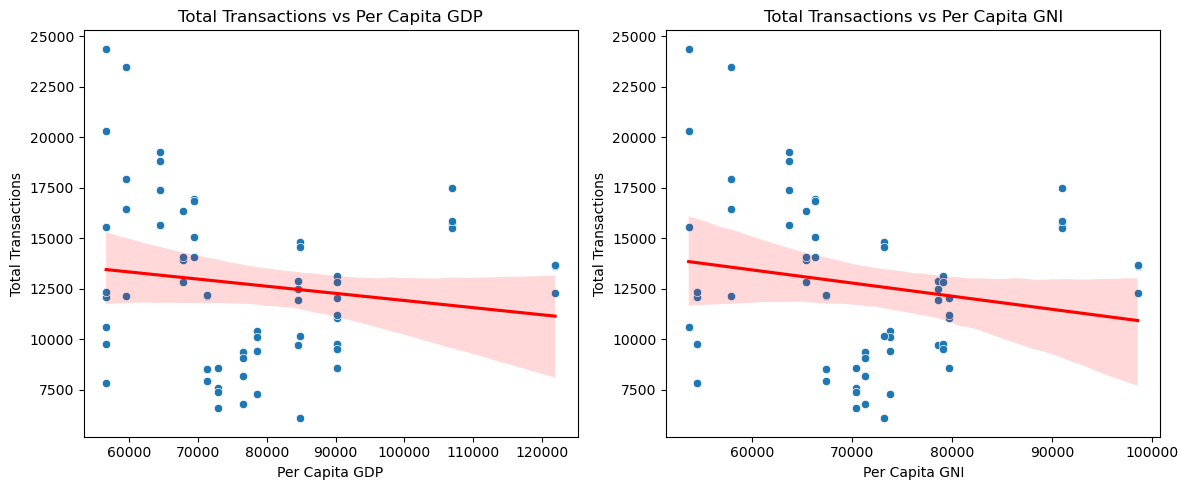

In [42]:
# Create a copy of the DataFrame to avoid modifying the original data
plot_data = merged_data.copy()

# Aggregate the transactions/applications data
plot_data['total_transactions'] = plot_data[
    ['private_new sale_completed', 'private_new sale_uncompleted', 'private_resale_applied', 'private_sub sale_applied',
     'hdb_1_room', 'hdb_2_room', 'hdb_3_room', 'hdb_4_room', 'hdb_5_room', 'hdb_executive']
].sum(axis=1)

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for Per Capita GDP vs total transactions
sns.scatterplot(data=plot_data, x='Per Capita GDP', y='total_transactions', ax=axes[0])
sns.regplot(data=plot_data, x='Per Capita GDP', y='total_transactions', ax=axes[0], scatter=False, line_kws={"color": "red"})
axes[0].set_title('Total Transactions vs Per Capita GDP')
axes[0].set_xlabel('Per Capita GDP')
axes[0].set_ylabel('Total Transactions')

# Scatter plot for Per Capita GNI vs total transactions
sns.scatterplot(data=plot_data, x='Per Capita GNI', y='total_transactions', ax=axes[1])
sns.regplot(data=plot_data, x='Per Capita GNI', y='total_transactions', ax=axes[1], scatter=False, line_kws={"color": "red"})
axes[1].set_title('Total Transactions vs Per Capita GNI')
axes[1].set_xlabel('Per Capita GNI')
axes[1].set_ylabel('Total Transactions')

plt.tight_layout()
plt.show()

# Analysis of

# Question 5: Should housing agents focus more on HDB or Private housing flats?

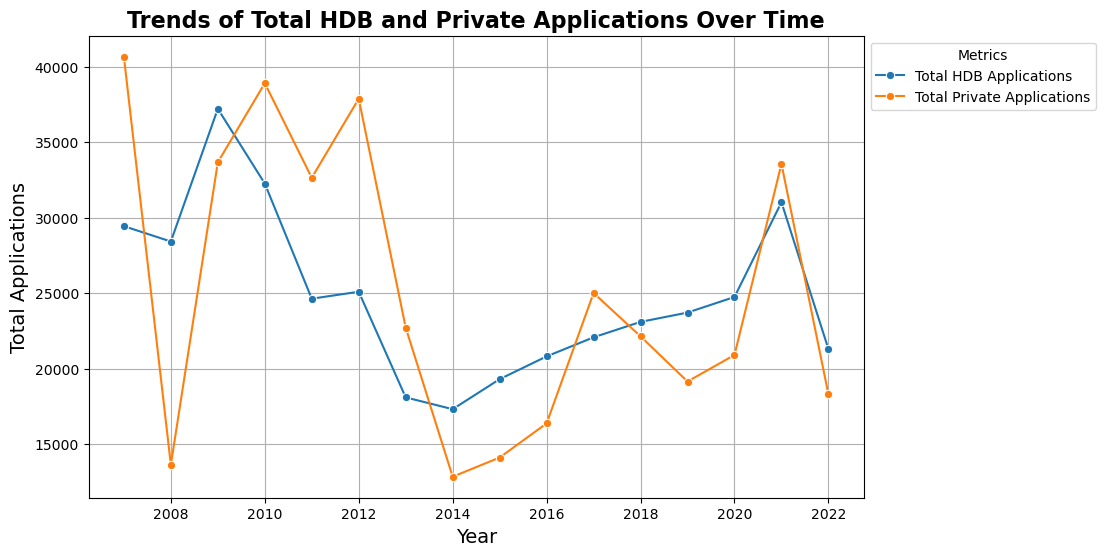

In [43]:
# Create a copy of the DataFrame for processing
processed_data = merged_data.copy()

# Aggregate total HDB applications
processed_data['total_hdb_applications'] = processed_data[
    ['hdb_1_room', 'hdb_2_room', 'hdb_3_room', 'hdb_4_room', 'hdb_5_room', 'hdb_executive']
].sum(axis=1)

# Aggregate total private applications
processed_data['total_private_applications'] = processed_data[
    ['private_new sale_completed','private_new sale_uncompleted', 'private_resale_applied', 'private_sub sale_applied']
].sum(axis=1)

# Extract the year from the quarter column
processed_data['year'] = processed_data['quarter'].str[:4].astype(int)

# Group by year and calculate annual sums
annual_data = processed_data.groupby('year').sum().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))

# Plot each series with a different color
sns.lineplot(data=annual_data, x='year', y='total_hdb_applications', label='Total HDB Applications', marker='o')
sns.lineplot(data=annual_data, x='year', y='total_private_applications', label='Total Private Applications', marker='o')

plt.title('Trends of Total HDB and Private Applications Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Applications', fontsize=14)
plt.legend(title='Metrics', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

## Analysis of Trends of Total HDB and Private Applications Over Time
1. **Early Trends (2007-2010)**:
   - In 2007, there were significantly more private housing applications than HDB applications.
   - Private applications dropped sharply in 2008 but recovered in 2009-2010.
   - HDB applications remained more stable during this period.

2. **Middle Trends (2011-2014)**:
   - From 2011 to 2013, both HDB and private applications fluctuated, with private applications generally being higher.
   - In 2013-2014, private applications saw a significant decline, while HDB applications also decreased but at a slower rate.

3. **Recent Trends (2015-2022)**:
   - Between 2015 and 2018, both HDB and private applications were relatively low, with a slight recovery in private applications in 2017.
   - From 2019 to 2022, both HDB and private applications increased, with peaks in 2020 and 2022.
   - Overall, both HDB and private applications have been recovering in recent years, with HDB applications showing a more consistent upward trend.

#### Conclusion:
- **Focus on Both**: Both HDB and private applications have shown fluctuations and recoveries. Housing agents should focus on both, adjusting their strategy based on market conditions and economic factors.
- **HDB Applications**: HDB applications tend to be more stable and predictable. Agents preferring stability might focus more on HDB flats.
- **Private Applications**: Private applications are more volatile but can have higher peaks, offering potential for higher returns during strong market periods.

#### Recommendations:
- **Market Analysis**: Continuously monitor market trends and economic indicators like GDP to make informed decisions.
- **Diversified Strategy**: Maintain a balanced portfolio by focusing on both HDB and private flats to achieve stability and potential high returns.

# Question 6: How do the prices of private and HDB resale properties compare across different quarters?

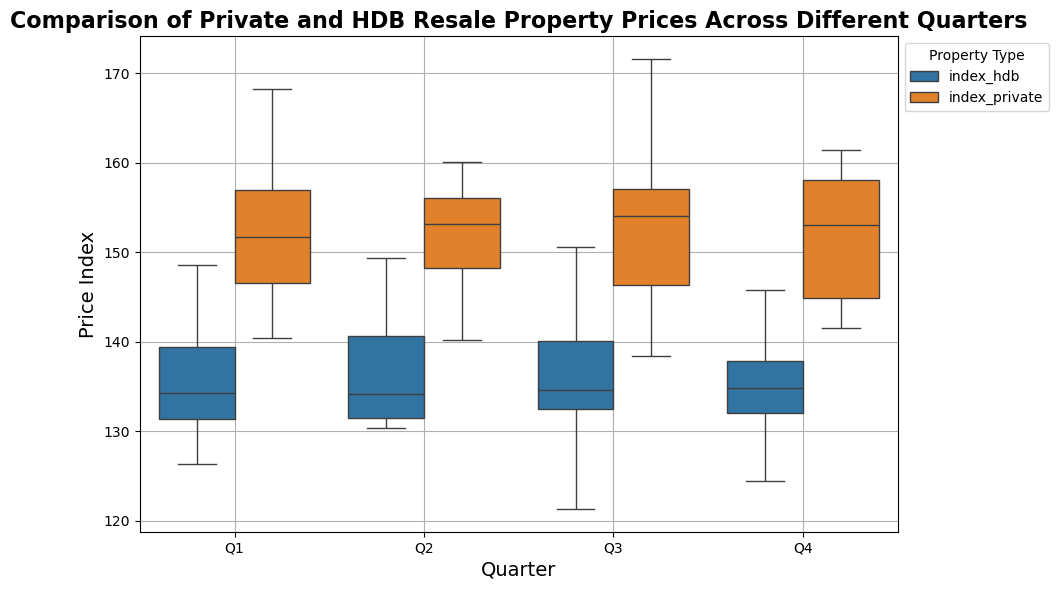

In [50]:
# # Extract the quarter part (Q1, Q2, Q3, Q4) from the quarter column
# merged_data['quarter_only'] = merged_data['quarter'].str[-2:]

# # Prepare data for plotting
# data_for_plotting = merged_data.melt(id_vars='quarter_only', value_vars=['index_hdb', 'index_private'],
#                                      var_name='Index Type', value_name='Price Index')

# # Plot the box plot
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='quarter_only', y='Price Index', hue='Index Type', data=data_for_plotting)

# plt.title('Comparison of Private and HDB Resale Property Prices Across Different Quarters', fontsize=16, fontweight='bold')
# plt.xlabel('Quarter', fontsize=14)
# plt.ylabel('Price Index', fontsize=14)
# plt.legend(title='Property Type', loc='upper left', bbox_to_anchor=(1, 1))
# plt.grid(True)
# plt.show()


# Function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)
    return df.loc[filter]

# Extract the quarter part (Q1, Q2, Q3, Q4) from the quarter column
merged_data['quarter_only'] = merged_data['quarter'].str[-2:]

# Remove outliers for both index types
merged_data_no_outliers_hdb = remove_outliers(merged_data, 'index_hdb')
merged_data_no_outliers = remove_outliers(merged_data_no_outliers_hdb, 'index_private')

# Prepare data for plotting
data_for_plotting = merged_data_no_outliers.melt(id_vars='quarter_only', 
                                                 value_vars=['index_hdb', 'index_private'],
                                                 var_name='Index Type', 
                                                 value_name='Price Index')

# Plot the box plot with showfliers=False
plt.figure(figsize=(10, 6))
sns.boxplot(x='quarter_only', y='Price Index', hue='Index Type', data=data_for_plotting, showfliers=False)

plt.title('Comparison of Private and HDB Resale Property Prices Across Different Quarters', fontsize=16, fontweight='bold')
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Price Index', fontsize=14)
plt.legend(title='Property Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

### Analysis of Comparison of Private and HDB Resale Property Prices Across Different Quarters

#### Comparison of Prices of Private and HDB Resale Properties Across Different Quarters

1. **General Observations:**
   - **Private Property Prices**: Generally higher than HDB resale property prices across all quarters. This indicates that private properties are more suitable for higher-income individuals who can afford the premium.
   - **HDB Resale Property Prices**: Lower than private property prices, making them more suitable for middle-income individuals or those looking for more affordable housing options.

2. **Price Stability and Variability:**
   - **Private Properties**:
     - **Q1**: Shows moderate variability with a higher median price around 150.
     - **Q2**: Prices are relatively stable, with the median price slightly lower than in Q1 but still above 150.
     - **Q3**: The most stable quarter with less variability and a median price around 150.
     - **Q4**: Shows moderate variability, similar to Q1, with a slightly higher median price around 150-160.
   - **HDB Resale Properties**:
     - **Q1**: Shows moderate variability with a median price around 140.
     - **Q2**: Prices are relatively stable with the least variability and a median price around 140.
     - **Q3**: Shows more variability compared to Q2, with a lower median price around 130.
     - **Q4**: Prices are the most stable in this quarter with the least variability and a median price around 130-135.

3. **Most Stable Prices:**
   - **Private Properties**: Q3 shows the most stable prices with the least variability.
   - **HDB Resale Properties**: Q2 and Q4 show the most stable prices with the least variability.

4. **Higher Prices:**
   - **Private Properties**: Consistently higher across all quarters with the highest median prices observed in Q4.
   - **HDB Resale Properties**: Consistently lower than private properties with the highest median prices observed in Q1 and Q2.

5. **Sales Strategy Insights:**
   - **For High-Income Clients**: Focus on marketing private properties, especially in Q1 and Q4 when prices are higher and variability is moderate.
   - **For Middle-Income Clients**: Focus on marketing HDB resale properties, especially in Q2 and Q4 when prices are more stable.
   - **Price Stability**: Highlight the stability of private property prices in Q3 and HDB resale prices in Q2 and Q4 to potential buyers who prioritize stable investment.
   - **Investment Opportunities**: Private properties in Q3 could be marketed as a stable investment due to their lower variability, while HDB resale properties in Q2 and Q4 can be promoted for their affordability and price stability.

#### Conclusion
This analysis provides a comprehensive comparison of private and HDB resale property prices across different quarters. Sales strategies can be tailored based on the income levels of potential clients, focusing on quarters with higher price stability for investment-oriented buyers and emphasizing affordability and stability for those seeking more economical housing options.